# Introduction

This is a quick data visualization project for learning purposes.

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Initial data exploration

Seems like this is high usability clean datased

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [11]:
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [12]:
recent_grads = recent_grads.dropna()

In [13]:
clean_data_count = recent_grads.shape[0]
print(clean_data_count)

172


# Visualizing the data

There is a weak positive correlations between some of the data points.
- Students in more popular majors make more money
- Students that majored in subjects that were majority female have higher unemployment rate
- Median salary is affected by the number of full-time workers

(15000, 120000)

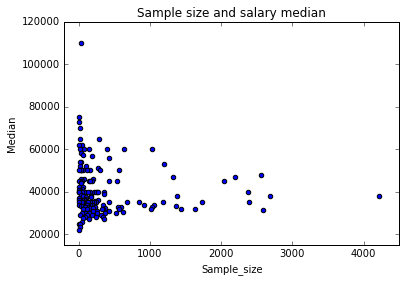

In [42]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind = 'scatter')
ax.set_title('Sample size and salary median')
ax.set_xlim(-200, 4500)
ax.set_ylim(15000, 120000)

(-0.01, 0.25)

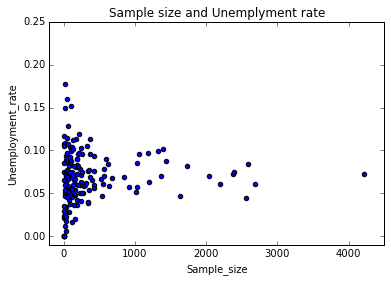

In [30]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind = 'scatter')
ax.set_title('Sample size and Unemplyment rate')
ax.set_xlim(-200, 4500)
ax.set_ylim(-0.01, 0.25)

(15000, 120000)

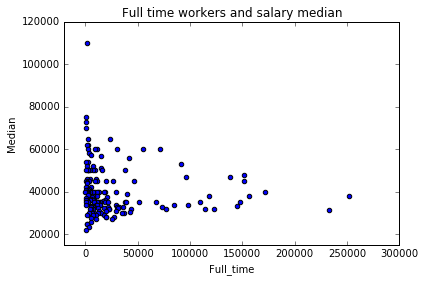

In [36]:
ax = recent_grads.plot(x='Full_time', y='Median', kind = 'scatter')
ax.set_title('Full time workers and salary median')
ax.set_xlim(-20000, 300000)
ax.set_ylim(15000, 120000)

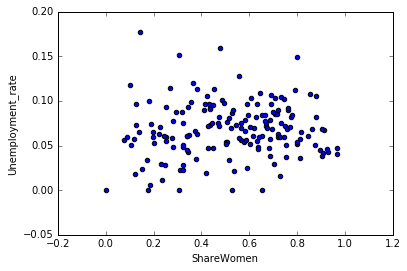

In [37]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

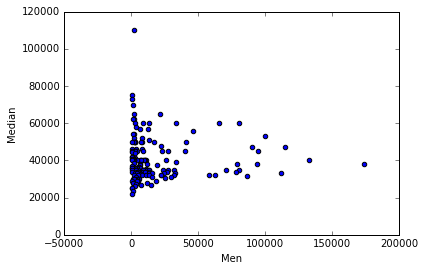

In [39]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

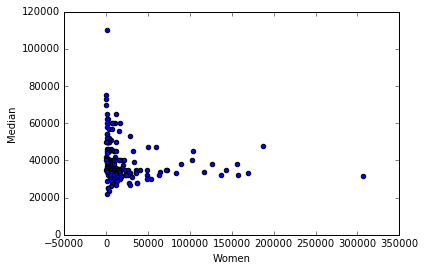

In [40]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

# Exploring the distributions

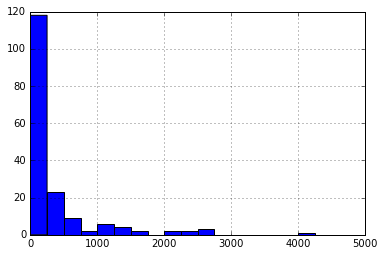

In [46]:
recent_grads['Sample_size'].hist(bins=20, range=(0,5000))

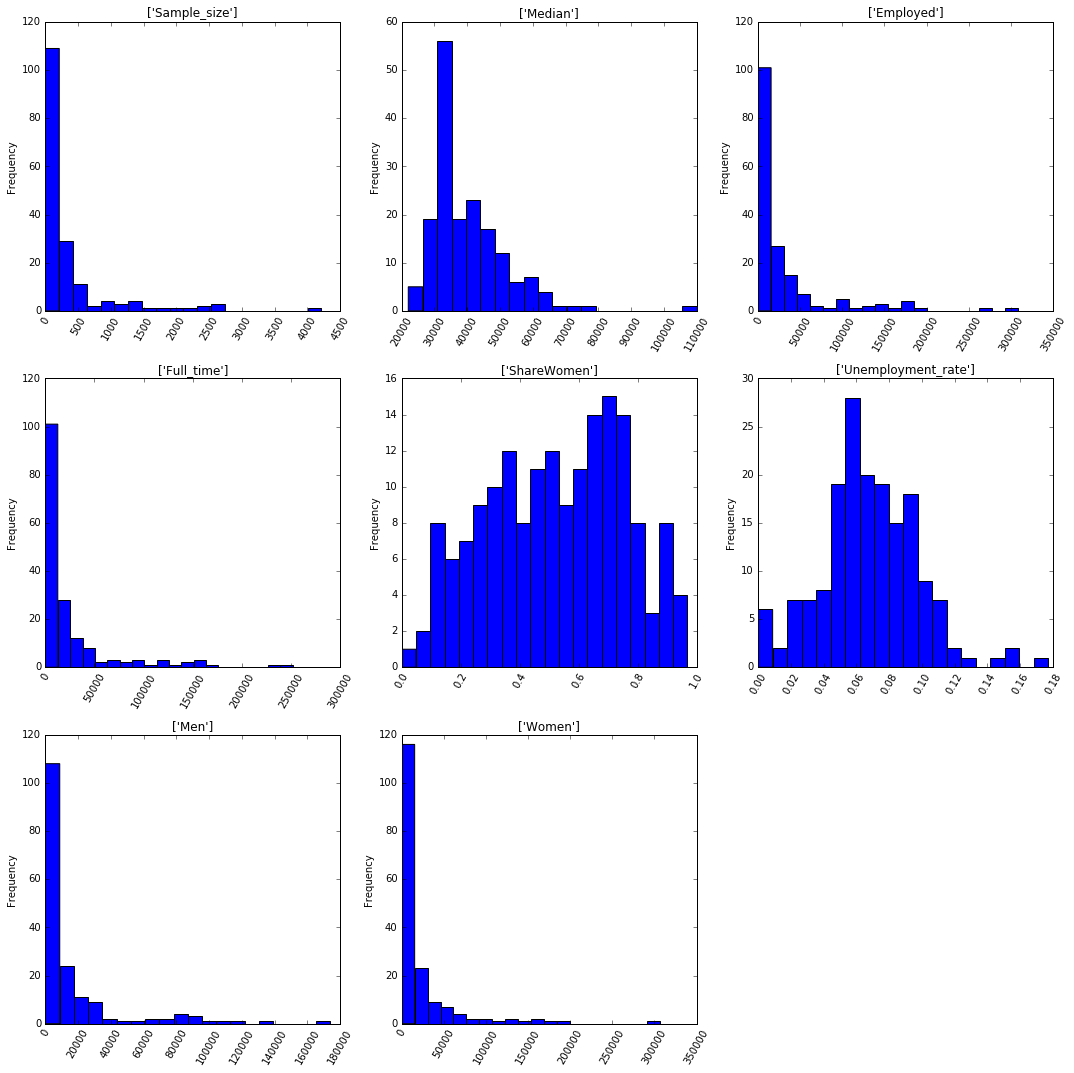

In [91]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", 
        "Men", "Women"]

fig = plt.figure(figsize = (15,15))
for num in range(0,8):
    ax = fig.add_subplot(3,3,num+1)
    ax.set_title([cols[num]])
    ax.set_ylabel('Frequency')
    plt.xticks(rotation='60')
    plt.tight_layout()
    ax = ax.hist(recent_grads[cols[num]], bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faec1d7e208>,
      dtype=object)

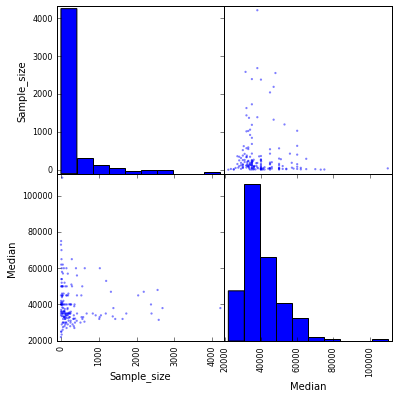

In [92]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faec22b59b0>,
      dtype=object)

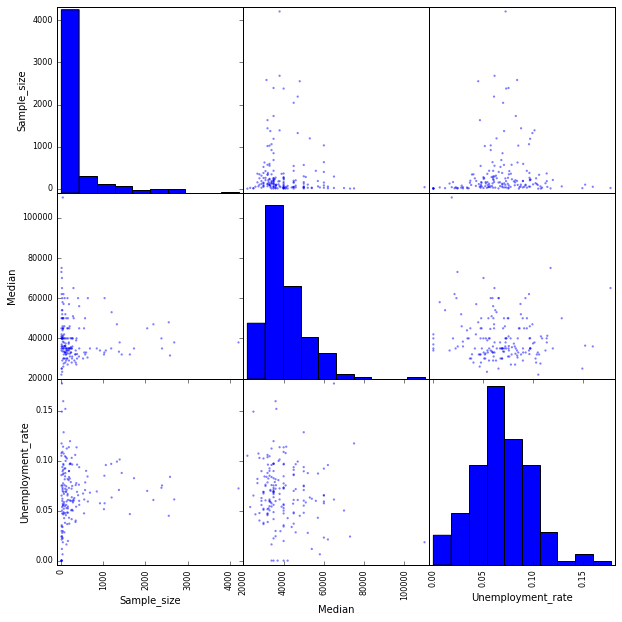

In [93]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

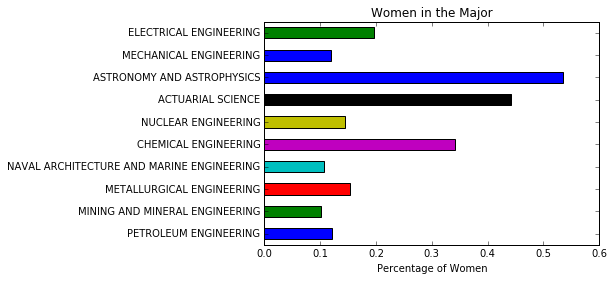

In [112]:
ax = recent_grads.head(10)['ShareWomen'].plot(kind='barh')
ax.set_title('Women in the Major')
ax.set_yticklabels(recent_grads.head(10)['Major'])
ax.set_xlabel('Percentage of Women')

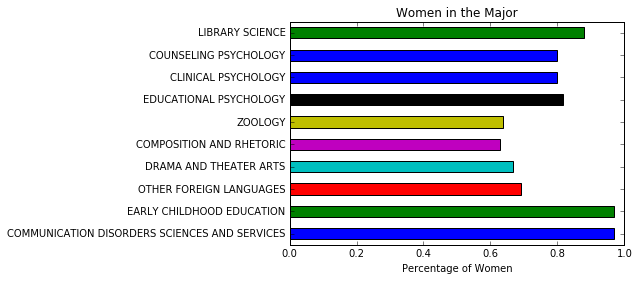

In [113]:
ax = recent_grads.tail(10)['ShareWomen'].plot(kind='barh')
ax.set_title('Women in the Major')
ax.set_yticklabels(recent_grads.tail(10)['Major'])
ax.set_xlabel('Percentage of Women')

# Future steps of the project:

Here are some ideas:

- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.